In [71]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [72]:
class YawController:
    def __init__(self, P, I, D):
        self.P = P
        self.I = I
        self.D = D
        self.integral_error = 0.0
        self.previous_error = 0.0

    def compute_control(self, error, dt):
        self.integral_error += error * dt
        derivative_error = (error - self.previous_error) / dt
        self.previous_error = error
        return self.P * error + self.I * self.integral_error + self.D * derivative_error

In [73]:
class Quadcopter:
    def __init__(self, mass=1.0, inertia=np.eye(3), drag_coeffs=np.zeros(3)):
        self.mass = mass
        self.inertia = inertia
        self.drag_coeffs = drag_coeffs
        self.position = np.zeros(3)
        self.velocity = np.zeros(3)
        self.orientation = np.eye(3)

    def update_state(self, thrusts, dt):
        # Compute forces and torques
        gravity = np.array([0, 0, -9.81]) * self.mass
        thrusts = np.array(thrusts)
        forces = np.dot(self.orientation, np.array([0, 0, sum(thrusts)])) + gravity
        drag = -self.drag_coeffs * self.velocity
        torques = np.cross(np.array([1, 0, 0]), thrusts[0] * np.array([0, 1, 0])) + \
                  np.cross(np.array([0, 1, 0]), thrusts[1] * np.array([-1, 0, 0])) + \
                  np.cross(np.array([-1, 0, 0]), thrusts[2] * np.array([0, -1, 0])) + \
                  np.cross(np.array([0, -1, 0]), thrusts[3] * np.array([1, 0, 0]))

        # Compute accelerations and angular velocities
        linear_acceleration = forces / self.mass
        angular_acceleration = np.dot(np.linalg.inv(self.inertia), torques)
        self.velocity += linear_acceleration * dt
        self.position += self.velocity * dt
        angular_velocity_skew = np.array([[0, -self.orientation[2, 2], self.orientation[1, 2]],
                                          [self.orientation[2, 2], 0, -self.orientation[0, 2]],
                                          [-self.orientation[1, 2], self.orientation[0, 2], 0]])
        self.orientation += np.dot(angular_velocity_skew, self.orientation) * dt
        self.orientation += np.dot(self.orientation, angular_velocity_skew) * dt
        self.orientation += angular_acceleration * dt

    def get_yaw(self):
        return math.atan2(self.orientation[1, 0], self.orientation[0, 0])

    def set_position(self, position):
        self.position = np.array(position)

    def set_velocity(self, velocity):
        self.velocity = np.array(velocity)

    def set_orientation(self, orientation):
        self.orientation = np.array(orientation)

In [86]:
# Set up quadcopter and yaw controller
quadcopter = Quadcopter()
yaw_controller = YawController(P=0.00, I=0.00, D=0.000)

In [87]:
# Set up simulation parameters
dt = 0.01  # time step in seconds
t_end = 20.0  # end time in seconds
t = np.arange(0, t_end, dt)
yaw_setpoint = np.ones_like(t) * 0.5  # step input in radians

In [94]:
# Set up arrays to store results
yaw = np.zeros_like(t)

# Simulate quadcopter dynamics
for i in range(len(t)):
    # Compute yaw rate setpoint from yaw error
    yaw_error = yaw_setpoint[i] - quadcopter.get_yaw()
    yaw_rate_setpoint = yaw_controller.compute_control(yaw_error, dt)

    # Compute rotor thrusts from yaw rate setpoint
    thrusts = np.array([0.25, 0.25, 0.25, 0.25])  # equal thrusts for now
    thrusts[0] += yaw_rate_setpoint / 4
    thrusts[1] -= yaw_rate_setpoint / 4
    thrusts[2] -= yaw_rate_setpoint / 4
    thrusts[3] += yaw_rate_setpoint / 4

    # Update quadcopter state
    quadcopter.update_state(thrusts, dt)

    # Store results
    yaw[i] = quadcopter.get_yaw()

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


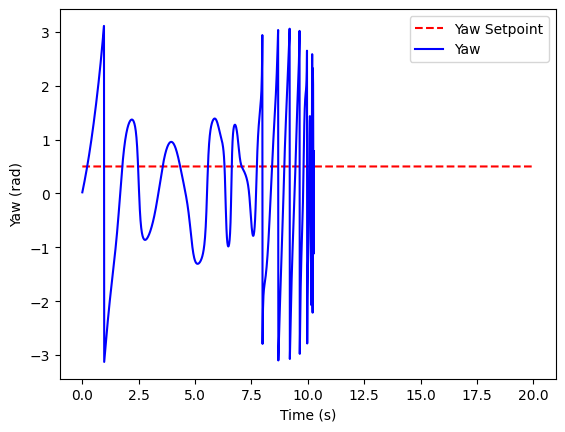

In [90]:
# Plot results
plt.plot(t, yaw_setpoint, 'r--', label='Yaw Setpoint')
plt.plot(t, yaw, 'b-', label='Yaw')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Yaw (rad)')
plt.show()